In [2]:
from access import access, weights, datasets
import logging
import requests
import json

import logging
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from shapely.geometry import Point

In [3]:
house2 = pd.read_csv("https://raw.githubusercontent.com/nelsoniu/dissertation_2022/main/test2.csv")

In [6]:
house = pd.read_csv('https://raw.githubusercontent.com/nelsoniu/dissertation_2022/main/test_data.csv')

In [8]:
house.head(200)

,Unnamed: 0,resale_price,id,lon,lat
0,1,260000.0,4647,103.853827,1.362033
1,2,264000.0,4647,103.853827,1.362033
2,3,267000.0,3843,103.847667,1.367929
3,4,306000.0,1624,103.836978,1.376345
4,5,308000.0,1578,103.837431,1.375243
...,...,...,...,...,...
195,196,390000.0,339,103.847667,1.347495
196,197,395000.0,140,103.848026,1.345674
197,198,402500.0,3676,103.838026,1.351319
198,199,408000.0,339,103.847667,1.347495


In [11]:

# creating a geometry column 
geometry = [Point(xy) for xy in zip(house['lon'], house['lat'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(house, crs=crs, geometry=geometry)

/Users/niu/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [12]:
gdf.type

0         Point
1         Point
2         Point
3         Point
4         Point
          ...  
160976    Point
160977    Point
160978    Point
160979    Point
160980    Point
Length: 160981, dtype: object

In [6]:

# Load in Singapore subzone shapefile

SG_boundary = gpd.read_file('sg_subzone.zip')
SG_boundary = SG_boundary.to_crs('SVY21')

<AxesSubplot:>

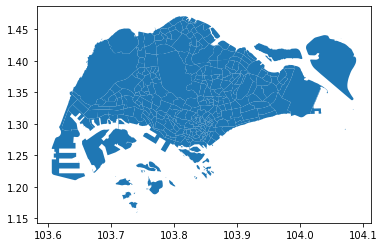

In [7]:
SG_boundary.plot()

In [8]:

# Get centroid 
for i in range(0,len(SG_boundary)):
    SG_boundary.loc[i,'centroid_lon'] = SG_boundary.geometry.centroid.x.iloc[i]
    SG_boundary.loc[i,'centroid_lat'] = SG_boundary.geometry.centroid.y.iloc[i]

<ipython-input-8-4ff5c38a000c>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  SG_boundary.loc[i,'centroid_lon'] = SG_boundary.geometry.centroid.x.iloc[i]
<ipython-input-8-4ff5c38a000c>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  SG_boundary.loc[i,'centroid_lat'] = SG_boundary.geometry.centroid.y.iloc[i]


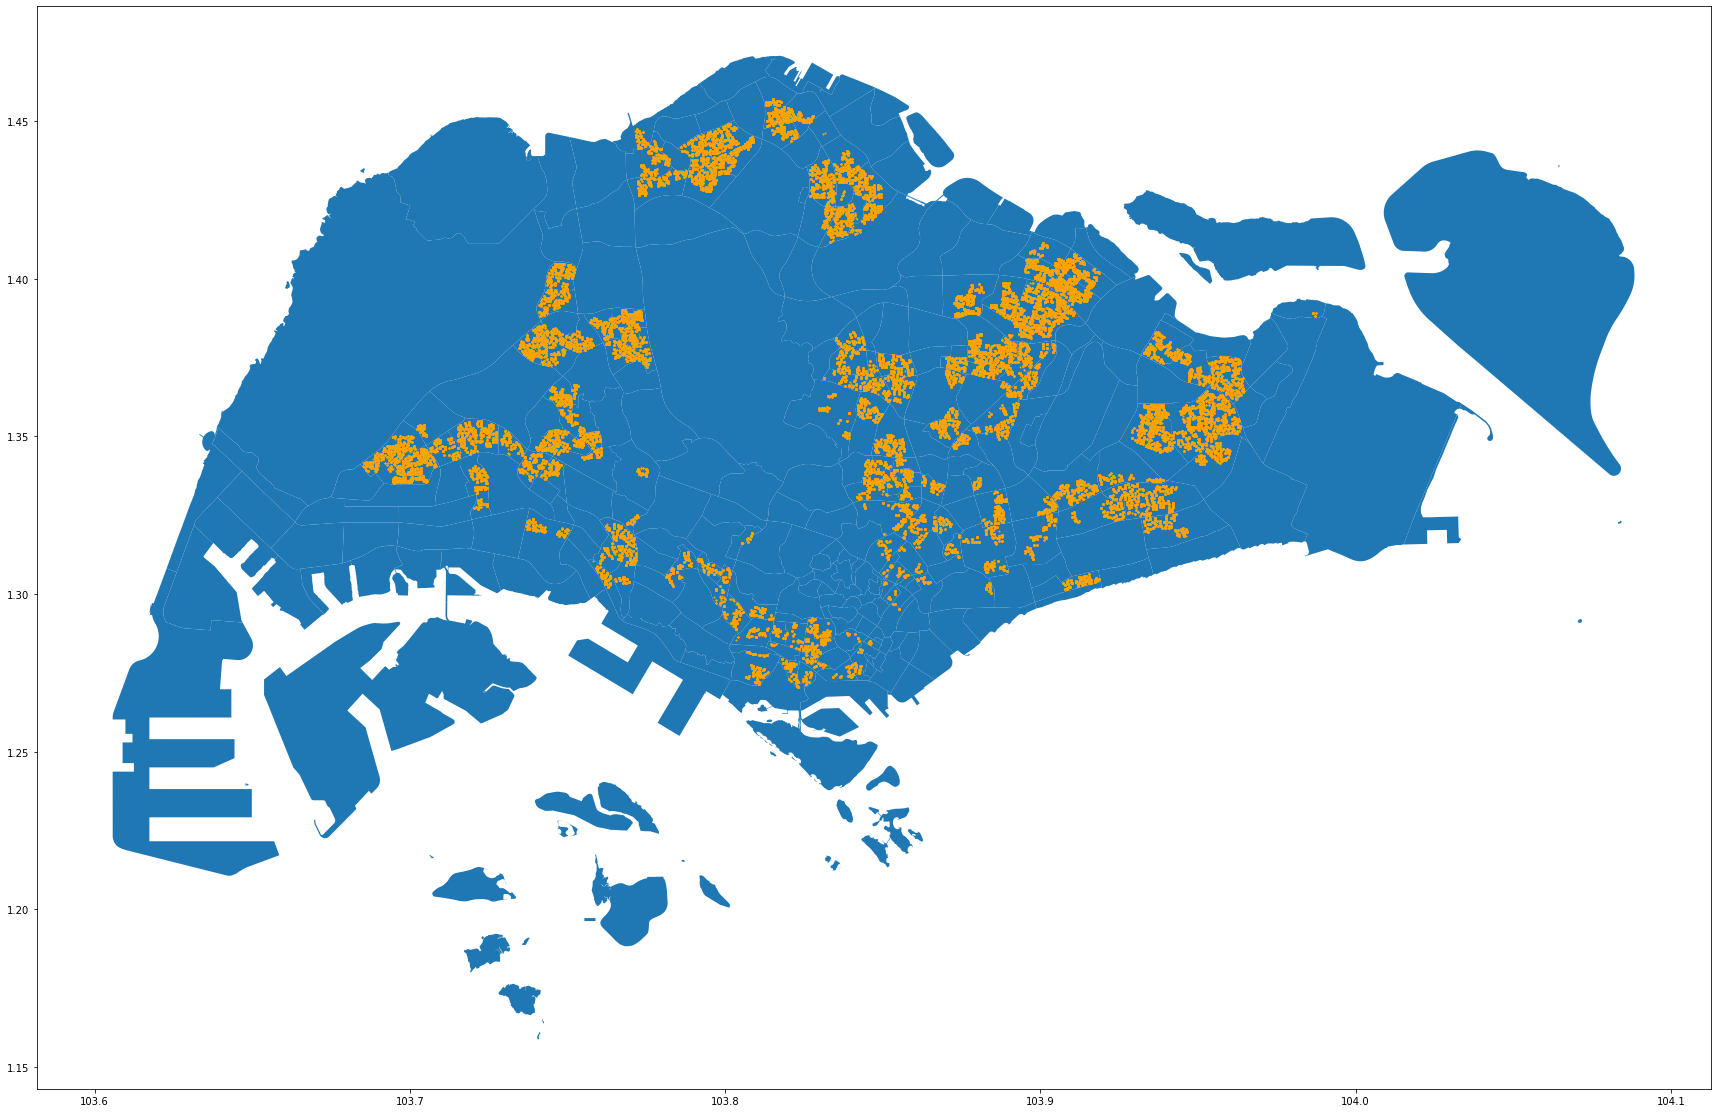

In [21]:

# Plotting Supply Points

gdf.plot(ax=SG_boundary.plot(figsize=(30, 20)), marker='o', color='orange', markersize=1);

In [4]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(house2['lon'], house2['lat'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(house2, crs=crs, geometry=geometry)

/Users/niu/opt/anaconda3/lib/python3.8/site-packages/pyproj/crs/crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


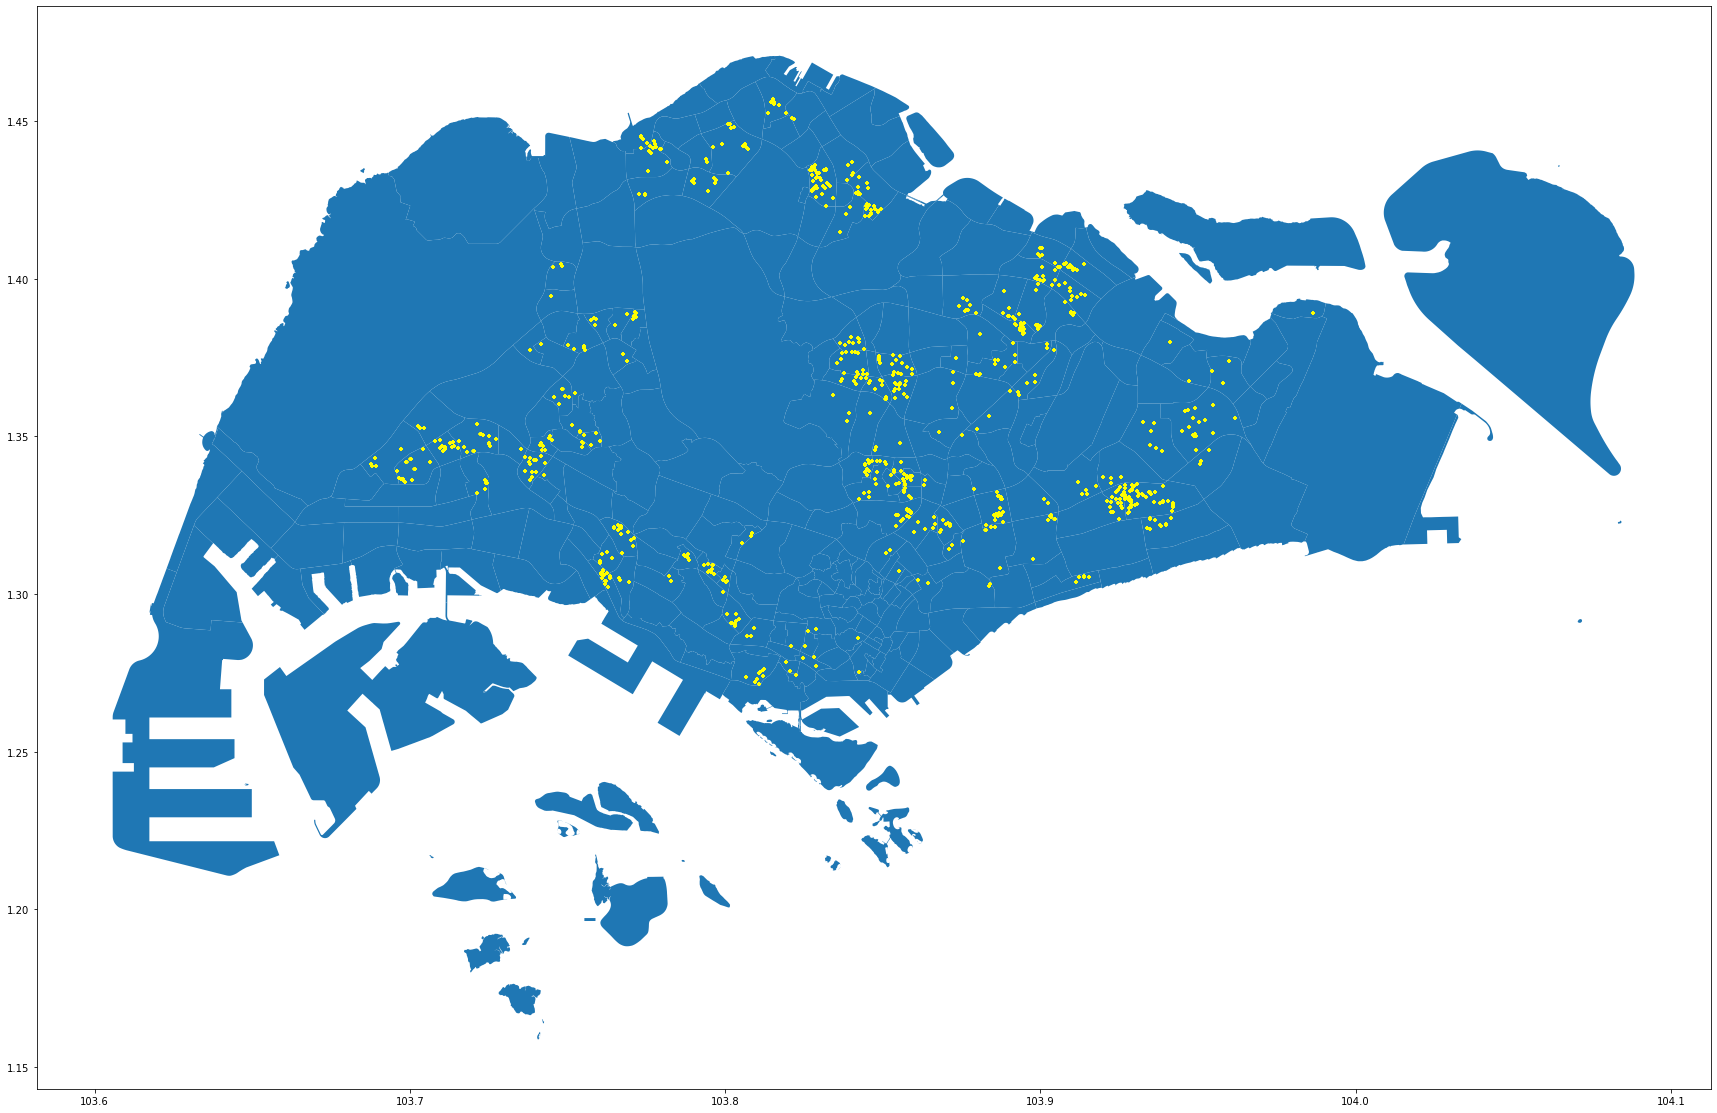

In [15]:
gdf.plot(ax=SG_boundary.plot(figsize=(30, 20)), marker='+', color='yellow', markersize=10);